In [1]:
# required Python imports
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace

import ftir_funct as f

np.set_printoptions(suppress=True)


module FTIR v.2024.4.11 imported


In [2]:
database = SimpleNamespace()
database.euler = np.array([45, 28, 133])

# Transmission values for lambda 1987.29
Ta = 0.009882
Tb = 0.995815
Tc = 0.596951

# Generate a mesh of values defining the reference transmissión envelope
polar, azimuths = f.regular_S2_grid(n_squared=500)
T = f.Tvalues(trans=(Ta, Tb, Tc), azimuth=azimuths, polar=polar)
x, y, z = f.sph2cart(T, azimuths, polar)

# Generate 36 measures at different azimuth angles
angles = np.arange(0, 360, 10)

# initialize variables
T_vals = []
azi_vals = []


# rotate
x2, y2, z2 = f.rotate(coordinates=(x, y, z), euler_ang=database.euler)

# extract XY intersection
xy_vectors = f.extract_XY_section_fast2(x2, y2, z2)

# get the indexes of specific angles
indexes = f.find_nearest(xy_vectors['angles'], angles)

# append values
T_vals.append(xy_vectors.loc[indexes, ['T']].T.values.tolist()[0])
azi_vals.append(xy_vectors.loc[indexes, ['angles']].T.values.tolist()[0])

# store values in database
database.T_values = np.array(T_vals)
database.azimuths = np.array(azi_vals)


In [3]:
database

namespace(euler=array([ 45,  28, 133]),
          T_values=array([[0.08047954, 0.12137285, 0.20527327, 0.33563205, 0.47642509,
                           0.62999712, 0.76238648, 0.87015437, 0.93452296, 0.94661094,
                           0.90545401, 0.82036499, 0.69568042, 0.54781635, 0.3961478 ,
                           0.25954405, 0.15633913, 0.09192085, 0.07960093, 0.11974844,
                           0.20886282, 0.33116157, 0.48125404, 0.62530791, 0.76643466,
                           0.87178628, 0.93457208, 0.9462812 , 0.90552176, 0.8175424 ,
                           0.69573372, 0.55108611, 0.39618194, 0.26186622, 0.15344221,
                           0.09192109]]),
          azimuths=array([[  0.48083123,  10.23847766,  19.81023682,  30.28169935,
                            39.89378382,  50.09678599,  59.7728222 ,  69.85440886,
                            80.0114777 ,  90.05888557, 100.17137303, 109.88416388,
                           119.92404069, 130.03864939, 140.1

In [4]:
x, y, _ = f.sph2cart(r=database.T_values, azimuth=np.deg2rad(database.azimuths))
x[0]

array([ 0.08047671,  0.11944017,  0.19312525,  0.28983729,  0.36552988,
        0.40413853,  0.38380811,  0.29968711,  0.16209384, -0.00097288,
       -0.15989682, -0.27902225, -0.34704117, -0.35241256, -0.3039598 ,
       -0.22506566, -0.14676478, -0.09052581, -0.07960076, -0.11793204,
       -0.19608857, -0.28691354, -0.36751204, -0.4038017 , -0.38207032,
       -0.29760771, -0.16169795,  0.00422865,  0.15988353,  0.28151701,
        0.34706984,  0.35289477,  0.30398578,  0.22666469,  0.14435034,
        0.09052604])

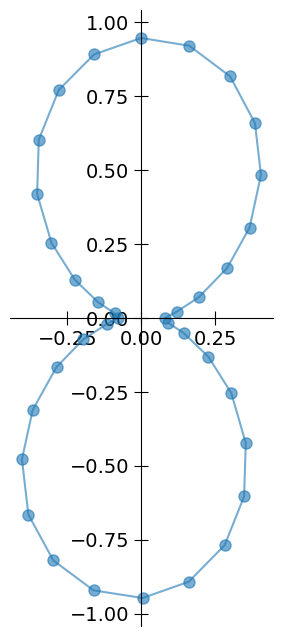

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(x[0], y[0], 'o-', markersize=8, color="C0", alpha=0.6)

# Move left y-axis and bottom x-axis to centre, passing through (0,0) and remove the box
ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(axis="both", which="major", length=10, labelsize=14, direction="inout")

# Set equal aspect ratio
plt.gca().set_aspect("equal")

## Adding Gaussian noise to T and azimuth values

In [6]:
# create a random generator
rgn = np.random.default_rng()

# set standard deviation
std_T = 0.04
std_azimuths = 1.0

database.T_noise = database.T_values + rgn.normal(0, std_T, database.T_values.shape)
database.azi_noise = database.azimuths + rgn.normal(0, std_azimuths, database.azimuths.shape)

In [7]:
x_noise, y_noise, _ = f.sph2cart(r=database.T_noise, azimuth=np.deg2rad(database.azi_noise))

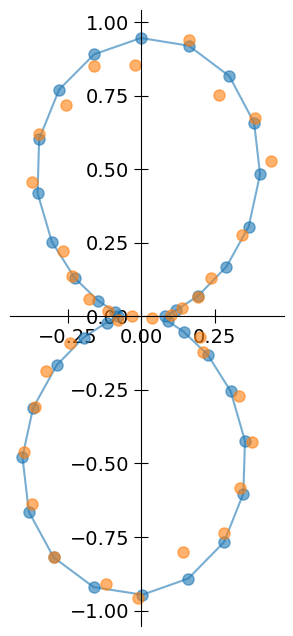

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(x[0], y[0], 'o-', markersize=8, color="C0", alpha=0.6)
ax.plot(x_noise[0], y_noise[0], 'o', markersize=8, color="C1", alpha=0.6)

# Move left y-axis and bottom x-axis to centre, passing through (0,0) and remove the box
ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(axis="both", which="major", length=10, labelsize=14, direction="inout")

# Set equal aspect ratio
plt.gca().set_aspect("equal")